# Step 1: Reading and Understanding the data

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [3]:
# Reading the given data

data = pd.read_csv('day.csv', header = 0, index_col = ['instant'])
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the number of rows and columns in the dataframe

data.shape

(730, 15)

In [5]:
# Check the column-wise info of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [6]:
# Check the summary for the numeric columns

data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


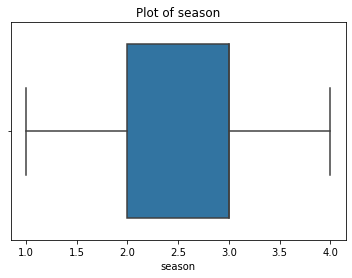

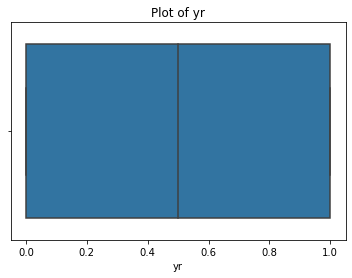

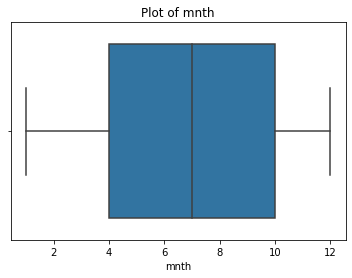

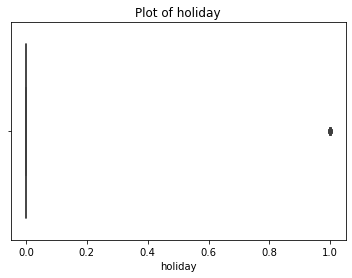

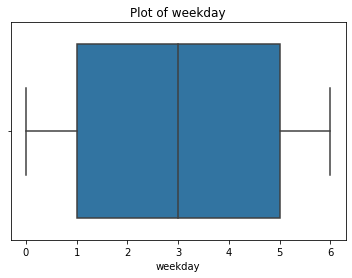

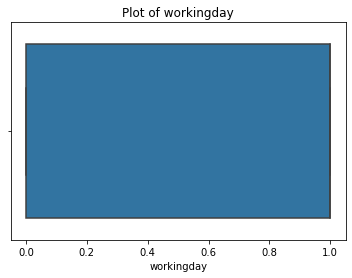

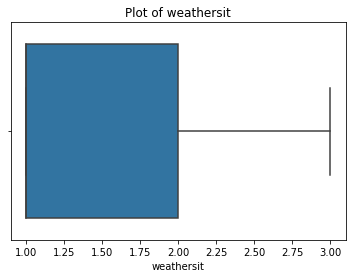

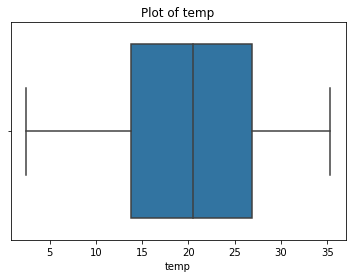

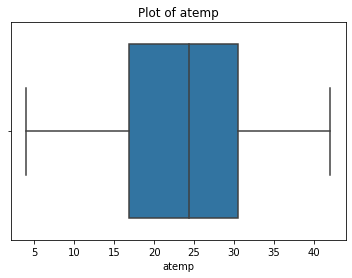

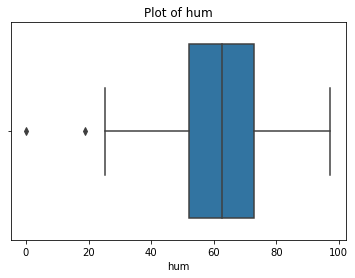

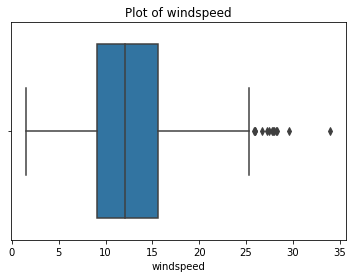

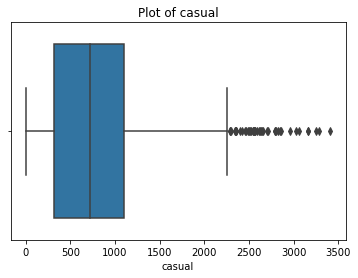

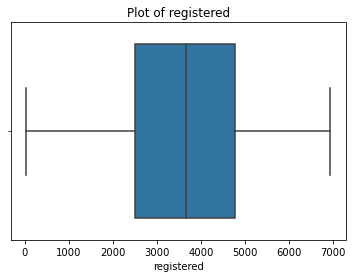

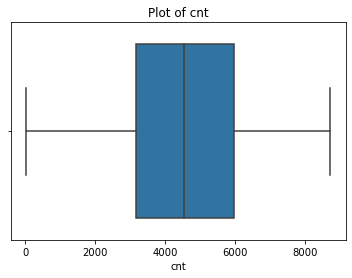

In [7]:
# Checking for outliers

numeric_data = ['season','yr', 'mnth', 'holiday','weekday','workingday','weathersit', 'temp','atemp','hum','windspeed','casual','registered','cnt']  
         
for column in numeric_data:
    sns.boxplot(data[column])
    plt.title('Plot of '+column)
    plt.show()

Inference: On inspection of the given dataset 'Data', we conclude that
1. There are no missing values in any columns 
2. All columns except 'dteday' are numeric in nature.
3. Outlier values can be detected in boxplots for 'hum', 'windspeed' and 'casual'.

# Step 2: Visualising the Data

In [8]:
# Converting the categorical columns into string values for visualisation

data['season'] = data['season'].replace((1,2,3,4),('spring', 'summer', 'fall', 'winter'))
data['yr'] = data['yr'].replace((0,1),('2018', '2019'))
data['mnth'] = data['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January', 'February', 'March', 'April','May','June','July','August','September','October','November','December'))
data['holiday'] = data['holiday'].replace((0,1),('No', 'Yes'))
data['weekday'] = data['weekday'].replace((0,1,2,3,4,5,6),('Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday'))
data['workingday'] = data['workingday'].replace((0,1),('No', 'Yes'))
data['weathersit'] = data['weathersit'].replace((1,2,3,4),('Clear', 'Mist_Cloudy', 'Light_Rain','Heavy_Rain'))

data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,2018,January,No,Monday,Yes,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,2018,January,No,Tuesday,Yes,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,2018,January,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,2018,January,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,2018,January,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


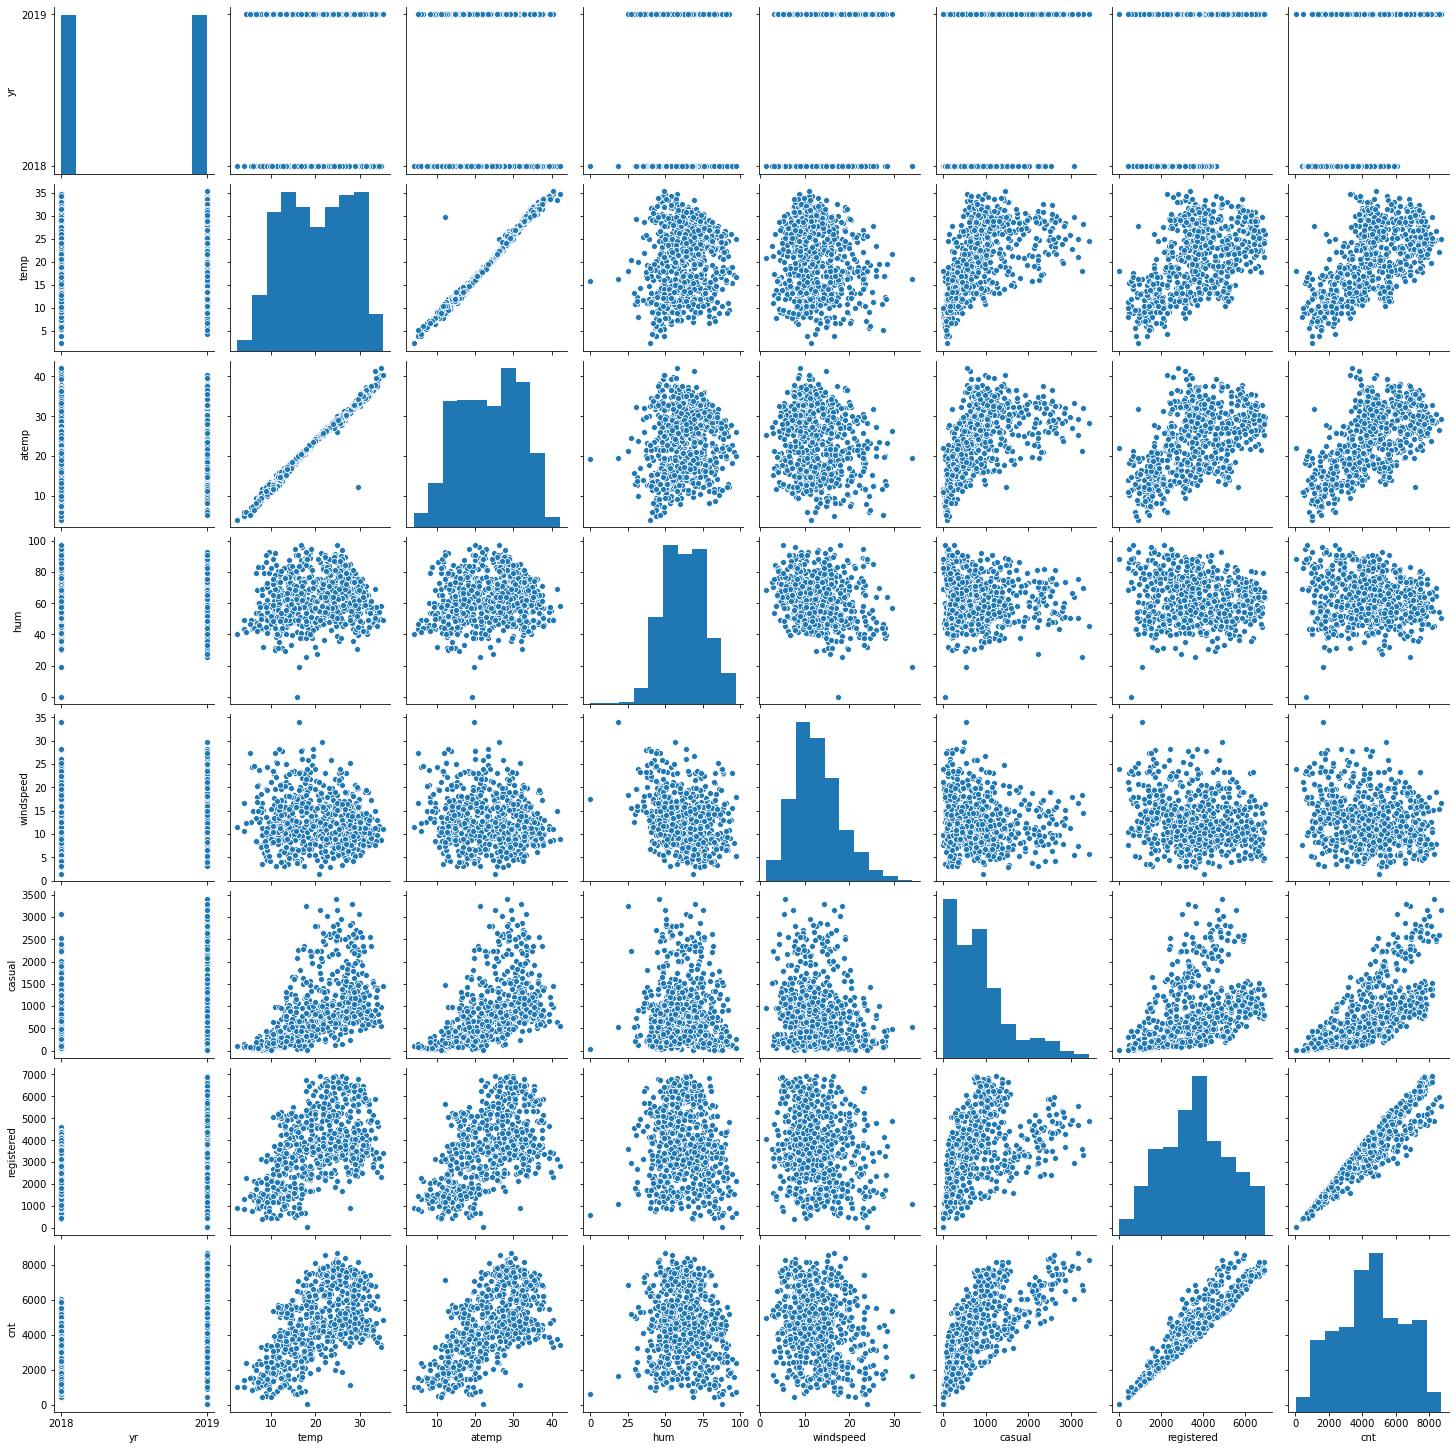

In [9]:
# Visualising the Numeric Variables

sns.pairplot(data)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

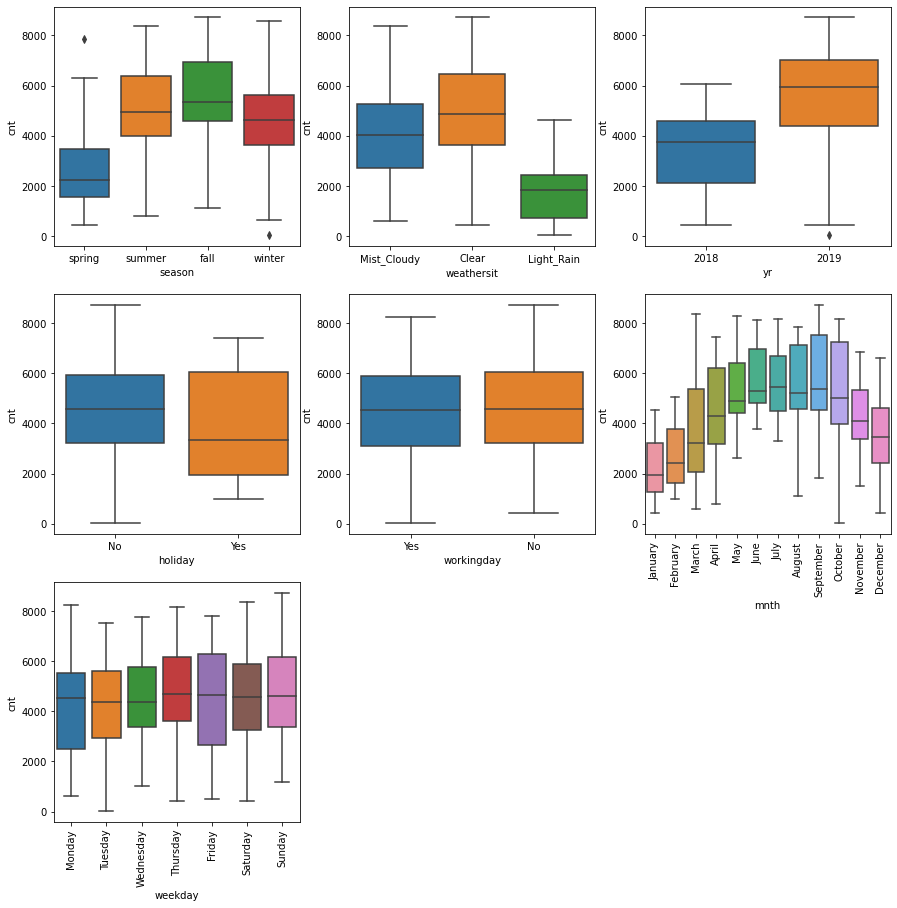

In [10]:
# Visualising the Categorical Variables

plt.figure(figsize = (15, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y= 'cnt', data = data) 
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y= 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y= 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y= 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y= 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'mnth', y= 'cnt', data = data)
plt.xticks(rotation = 90)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y= 'cnt', data = data)
plt.xticks(rotation = 90)

# Step 3: Data Preparation

In [11]:
# Encoding Binary Variables ('yr','holiday','workingday')

data['yr'] = data['yr'].replace(('2018', '2019'),(0,1),)
data['holiday'] = data['holiday'].replace(('No', 'Yes'), (0,1))
data['workingday'] = data['workingday'].replace(('No', 'Yes'), (0,1))

data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Adding dummy variables for other categorical variables

status = pd.get_dummies(data['season'], drop_first = True)
data = pd.concat([data,status], axis = 1)
data = data.drop(['season'], axis = 1)

status1 = pd.get_dummies(data['weathersit'], drop_first = True)
data = pd.concat([data,status1], axis = 1)
data = data.drop(['weathersit'], axis = 1)

status2 = pd.get_dummies(data['mnth'], drop_first = True)
data = pd.concat([data,status2], axis = 1)
data = data.drop(['mnth'], axis = 1)

status3 = pd.get_dummies(data['weekday'], drop_first = True)
data = pd.concat([data,status3], axis = 1)
data = data.drop(['weekday'], axis = 1)

data.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,1,0,0,0,0,0
2,02-01-2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,1,0
3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,1
4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Dropping variables which seems to be insignificant for the model   

data = data.drop('dteday', axis=1)
data = data.drop('casual', axis=1)
data = data.drop('registered', axis=1)

data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets

In [14]:
# Performing the train_test split on the data

data_train, data_test = train_test_split(data, train_size = 0.7, random_state = 100)
print(data_train.shape)
print(data_test.shape)

(510, 30)
(220, 30)


In [15]:
# Rescaling the features using Normalisation (Minmax Scaler)

scaler = MinMaxScaler()

var_num = ['cnt','windspeed','hum', 'atemp','temp']
data_train[var_num] = scaler.fit_transform(data_train[var_num])
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
729,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0
112,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,1,0,0,0


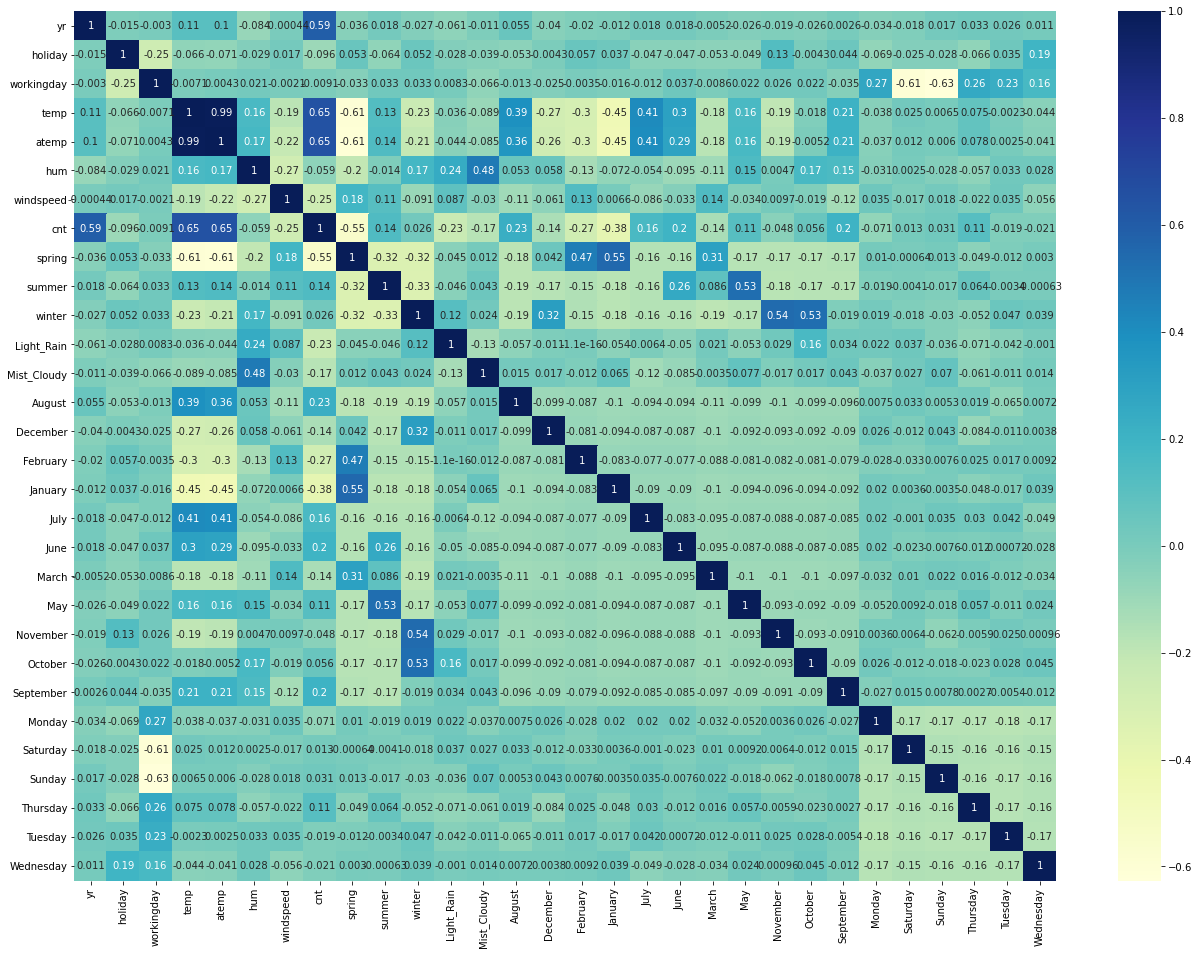

In [16]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (22,16))
sns.heatmap(data_train.corr(), annot = True, cmap = 'YlGnBu' )
plt.show()

In [17]:
# Dividing into X and Y sets for the model building

y_train = data_train.pop('cnt')
X_train = data_train

# Step 5: Building a linear model

Since the number of independent variables are too high, we would select top 15 variables coorelated to 'cnt' using RFE (Recursive Feature Elimination) technique.

In [18]:
# Using RFE to select relevant independent variables

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe    = RFE( lm, 15)
rfe  = rfe.fit(X_train, y_train)

In [19]:
# Checking the column-wise results of RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 15),
 ('May', False, 9),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [20]:
# Checking the variables supported by RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light_Rain', 'Mist_Cloudy', 'December', 'January', 'July',
       'November', 'September'],
      dtype='object')

In [21]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [22]:
# Building 1st model using statsmodel

# Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create model
lr_model = sm.OLS(y_train, X_train_rfe).fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          8.15e-189
Time:                        17:23:10   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      0.000       0.249       0.391
yr              0.2304      0.008     28.487      0.000       0.215       0.246
holiday        -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp            0.4815      0.037     13.005      0.000       0.409       0.554
hum            -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed      -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring         -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer          0.0423      0.015      2.761      0.006       0.012       0.072
winter          0.1019      0.018      5.656      0.000       0.067       0.137
Light_Rain     -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist_Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
December       -0.0355      0.018     -2.024      0.043      -0.070      -0.001
January        -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
November       -0.0387      0.019     -2.057      0.040      -0.076      -0.002
September       0.0755      0.017      4.466      0.000       0.042       0.109
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Checking vif for variables

vif = pd.DataFrame()
vif['Features']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,82.52
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.77
4,hum,1.92
14,November,1.77
12,January,1.68
10,Mist_Cloudy,1.57
11,December,1.50


In [24]:
# Dropping variable 'spring' as it has higher vif

X_train_rfe = X_train_rfe.drop('spring', axis = 1)

In [25]:
# Rebuilding 2nd model without 'spring'

# Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create model
lr_model = sm.OLS(y_train, X_train_rfe).fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          3.50e-188
Time:                        17:23:10   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2562      0.029      8.899      0.000       0.200       0.313
yr              0.2290      0.008     28.159      0.000       0.213       0.245
holiday        -0.0946      0.026     -3.670      0.000      -0.145      -0.044
temp            0.5550      0.027     20.527      0.000       0.502       0.608
hum            -0.1742      0.038     -4.601      0.000      -0.249      -0.100
windspeed      -0.1971      0.026     -7.634      0.000      -0.248      -0.146
summer          0.0729      0.011      6.548      0.000       0.051       0.095
winter          0.1369      0.013     10.204      0.000       0.111       0.163
Light_Rain     -0.2402      0.027     -9.058      0.000      -0.292      -0.188
Mist_Cloudy    -0.0514      0.010     -4.906      0.000      -0.072      -0.031
December       -0.0295      0.018     -1.683      0.093      -0.064       0.005
January        -0.0472      0.018     -2.590      0.010      -0.083      -0.011
July           -0.0452      0.018     -2.509      0.012      -0.081      -0.010
November       -0.0288      0.019     -1.548      0.122      -0.065       0.008
September       0.0903      0.016      5.571      0.000       0.058       0.122
==============================================================================
Omnibus:                       58.341   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.396
Skew:                          -0.649   Prob(JB):                     4.36e-27
Kurtosis:                       5.007   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Checking vif for variables

vif = pd.DataFrame()
vif['Features']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,51.76
3,temp,2.32
7,winter,2.09
4,hum,1.90
13,November,1.71
11,January,1.67
9,Mist_Cloudy,1.55
10,December,1.48
6,summer,1.44
12,July,1.43


In [27]:
# Dropping variable 'November' as it has higher p-value(>0.05)

X_train_rfe = X_train_rfe.drop('November', axis = 1)

In [28]:
# Rebuilding 3rd model without 'November'

# Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create model
lr_model = sm.OLS(y_train, X_train_rfe).fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          7.91e-189
Time:                        17:23:10   Log-Likelihood:                 508.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     496   BIC:                            -930.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2502      0.029      8.758      0.000       0.194       0.306
yr              0.2290      0.008     28.118      0.000       0.213       0.245
holiday        -0.0991      0.026     -3.863      0.000      -0.149      -0.049
temp            0.5624      0.027     21.111      0.000       0.510       0.615
hum            -0.1736      0.038     -4.580      0.000      -0.248      -0.099
windspeed      -0.1971      0.026     -7.621      0.000      -0.248      -0.146
summer          0.0740      0.011      6.651      0.000       0.052       0.096
winter          0.1263      0.012     10.926      0.000       0.104       0.149
Light_Rain     -0.2377      0.027     -8.968      0.000      -0.290      -0.186
Mist_Cloudy    -0.0511      0.010     -4.865      0.000      -0.072      -0.030
December       -0.0191      0.016     -1.177      0.240      -0.051       0.013
January        -0.0431      0.018     -2.388      0.017      -0.079      -0.008
July           -0.0461      0.018     -2.556      0.011      -0.082      -0.011
September       0.0930      0.016      5.760      0.000       0.061       0.125
==============================================================================
Omnibus:                       55.188   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.061
Skew:                          -0.625   Prob(JB):                     4.64e-25
Kurtosis:                       4.926   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Checking vif for variables

vif = pd.DataFrame()
vif['Features']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,50.81
3,temp,2.25
4,hum,1.90
11,January,1.63
7,winter,1.55
9,Mist_Cloudy,1.55
6,summer,1.44
12,July,1.43
10,December,1.26
8,Light_Rain,1.25


In [30]:
# Dropping variable 'December' as it has higher p-value(>0.05)

X_train_rfe = X_train_rfe.drop('December', axis = 1)

In [31]:
# Rebuilding 4th model without 'December'

# Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create model
lr_model = sm.OLS(y_train, X_train_rfe).fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.04e-189
Time:                        17:23:11   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2449      0.028      8.677      0.000       0.189       0.300
yr              0.2289      0.008     28.098      0.000       0.213       0.245
holiday        -0.0980      0.026     -3.824      0.000      -0.148      -0.048
temp            0.5715      0.026     22.407      0.000       0.521       0.622
hum            -0.1779      0.038     -4.714      0.000      -0.252      -0.104
windspeed      -0.1948      0.026     -7.551      0.000      -0.245      -0.144
summer          0.0756      0.011      6.843      0.000       0.054       0.097
winter          0.1248      0.011     10.859      0.000       0.102       0.147
Light_Rain     -0.2349      0.026     -8.895      0.000      -0.287      -0.183
Mist_Cloudy    -0.0504      0.010     -4.804      0.000      -0.071      -0.030
January        -0.0382      0.018     -2.174      0.030      -0.073      -0.004
July           -0.0468      0.018     -2.594      0.010      -0.082      -0.011
September       0.0944      0.016      5.858      0.000       0.063       0.126
==============================================================================
Omnibus:                       53.439   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.260
Skew:                          -0.611   Prob(JB):                     5.11e-24
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Checking vif for variables

vif = pd.DataFrame()
vif['Features']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,49.59
3,temp,2.06
4,hum,1.88
9,Mist_Cloudy,1.55
10,January,1.55
7,winter,1.53
11,July,1.43
6,summer,1.41
8,Light_Rain,1.24
5,windspeed,1.19


In [33]:
# Checking the shape of Final model

X_train_rfe.shape

(510, 13)

# Step 7: Residual Analysis of the train data

Text(0.5, 0, 'Errors')

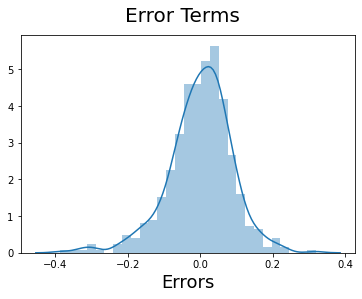

In [34]:
# Plotting Residuals for Analysis

y_train_pred = lr_model.predict(X_train_rfe)
res = y_train - y_train_pred

fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)        

# Step 8: Making Predictions Using the Final Model¶


In [35]:
# Rescaling the features of test dataset using Normalisation (Minmax Scaler)

var_num = ['cnt','windspeed','hum', 'atemp','temp']
data_test[var_num] = scaler.transform(data_test[var_num])

data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,0,0,1
536,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
300,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,0
222,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [36]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# Dividing into X_test and y_test

y_test = data_test.pop('cnt')
X_test = data_test

In [38]:
# Adding constant variable to test dataframe

X_test_sm = sm.add_constant(X_test)

In [39]:
# Creating X_test_sm dataframe by dropping variables from X_test_sm

X_test_sm = X_test_sm.drop(['workingday','atemp','August','February','June','March', 'May','October','Monday','Saturday','Sunday', 'Thursday','Tuesday','Wednesday', 'December', 'November', 'spring'], axis = 1)

X_test_sm

,const,yr,holiday,temp,hum,windspeed,summer,winter,Light_Rain,Mist_Cloudy,January,July,September
instant,,,,,,,,,,,,,
185,1.0,0,1,0.831783,0.657364,0.084219,0,0,0,1,0,1,0
536,1.0,1,0,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
300,1.0,0,0,0.511964,0.837699,0.334206,0,1,0,1,0,0,0
222,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
153,1.0,0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,1.0,1,0,0.519232,0.756118,0.283397,0,1,0,0,0,0,0
128,1.0,0,0,0.584649,0.650923,0.069510,1,0,0,0,0,0,0
641,1.0,1,0,0.745598,0.817947,0.052115,0,1,0,1,0,0,0


In [40]:
# Making predictions using the fourth model

y_test_pred = lr_model.predict(X_test_sm)

# Step 9: Model Evaluation

In [41]:
# Calculating R-squared score for the test set
r2_score(y_true= y_test, y_pred = y_test_pred)

0.8034772805912217